In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Review of PCA
PCA is a way to reduce dimensions in the problem. This means that if we have a lot of features, what we can do is reduce them to n PCA components(for example 2), and plot them to see what we get.

PCA is used extensively to find anomalies in the data, because if we plot the 2 PCA components and we see that there is a small cluster of dots separated from the majority of data, we can consider those data points to be anomalies

## What it does:
- Reduces the number of features while keeping the features information
- Removes correlation among features
- Emphasizes variations of strong features, making the data easier to visualize

**PCA finds n top eigenvectors based on their eigenvalues, and those n vectors represent the PCA components!**

## Let's use Sklearn to get our PCA from a sample dataset

In [4]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

df = pd.read_excel('pca_uk.xlsx')
df.head()

,England,N Ireland,Scotland,Wales,Features
0,375,135,458,475,Alcoholic drinks
1,57,47,53,73,Beverages
2,245,267,242,227,Carcase meat
3,1472,1494,1462,1582,Cereals
4,105,66,103,103,Cheese


**Important Note:**
When we are doing PCA, it is important that the X matrix that we give it has these qualities:
- Each row is a speficific feature, in this case, it would be a country(England)
- Each column represents a class, in this case it oculdn be "Alcaholic Drinks", or "Beverages", etc

In [10]:
feature_cols = ['England', 'N Ireland', 'Scotland', 'Wales']
feature_df = df[feature_cols]

X = feature_df.to_numpy()
print(f'X without transpose: {X}')
X = X.T
print(f'X with transpose: {X}')

X without transpose: [[ 375  135  458  475]
 [  57   47   53   73]
 [ 245  267  242  227]
 [1472 1494 1462 1582]
 [ 105   66  103  103]
 [  54   41   62   64]
 [ 193  209  184  235]
 [ 147   93  122  160]
 [1102  674  957 1137]
 [ 720 1033  566  874]
 [ 253  143  171  265]
 [ 685  586  750  803]
 [ 488  355  418  570]
 [ 198  187  220  203]
 [ 360  334  337  365]
 [1374 1506 1572 1256]
 [ 156  139  147  175]]
X with transpose: [[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]


In [11]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

"X_r" represents the new PCA matrix, where we have n rows where n is the number of features in the original data. 

In [13]:
X_r

array([[-144.99315218,   -2.53299944],
       [ 477.39163882,  -58.90186182],
       [ -91.869339  ,  286.08178613],
       [-240.52914764, -224.64692488]])

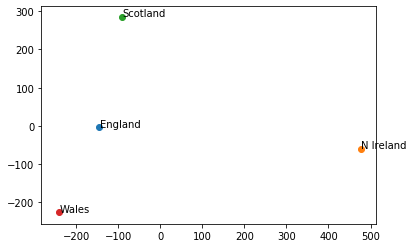

In [14]:
for feature, (plot_x,plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.5, plot_y+0.5, df.columns[:-1][feature])

**What conclusions can we make from this plot?**  
We can say that N. Ireland is more different from the others in it's food consumption

### **Difference in distance among PCA1 axis is greater than distance among PCA2 axis**

## PCA is an unsupervised learning algorithm

## The steps that PCA does:
1. Use the following matrix: X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
2. Subtract the column mean from the feature matrix -> this new matrix will be our centered matrix
3. Calculate the covariance of the centered matrix.
4. Calculate the eigenvalue and eigenvector of the covariance matrix. Remember how we did this in a previous activity!
5. Sort the eigevalues so that they are in decresing order, and then find the top N (for example, 2) eigenvectors
6. Dot multiply the centered matrix with the top N eigenvectors of the covariance matrix

In [19]:
def get_pca(X, n_components=2):
    
    # Assert that we have enough features for the input components
    assert X.shape[0] >= n_components
    
    # Get the column mean
    col_mean = X.mean(axis=0)
    
    # Get the centered matrix
    X_centered = X - col_mean
    
    # Get the covariance matrix of the centered array
    # We want columns to be features and rows to be classes, so we take the Transpose
    cov_matrix = np.cov(X_centered.T)
    
    # Want to obtain the eigen values and eigen vectors
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    
    # Sort the eigen values and get top 2 eigen vectors
    eig_v_to_i = {}
    for i, val in enumerate(eigen_values):
        eig_v_to_i[val] = i
        
    eigen_values.sort()
    top_eigen_values = eigen_values[::-1][:n_components]
    
    top_eigen_vectors = []
    for val in top_eigen_values:
        col_index = eig_v_to_i.get(val)
        vector = eigen_vectors[:, col_index]
        top_eigen_vectors.append(vector)
    top_eigen_vectors = np.array(top_eigen_vectors)

    pca_out = np.dot(X_centered, top_eigen_vectors[0:n_components].T)
    return pca_out

In [22]:
X = feature_df.to_numpy()
get_pca(X.T)

array([[ 144.99315218+0.j,   -2.53299944+0.j],
       [-477.39163882+0.j,  -58.90186182+0.j],
       [  91.869339  +0.j,  286.08178613+0.j],
       [ 240.52914764+0.j, -224.64692488+0.j]])

In [23]:
X_r

array([[-144.99315218,   -2.53299944],
       [ 477.39163882,  -58.90186182],
       [ -91.869339  ,  286.08178613],
       [-240.52914764, -224.64692488]])

In [29]:
# Our function to compare 
def PCA_calculation(data, n_comp=2):
    M = np.mean(data, axis=0)
    # center columns by subtracting column means
    C =  data - M
    # calculate covariance matrix of centered matrix
    V = np.cov(C.T)
#     print(V)
    # eigen decomposition of covariance matrix
    eig_value, eig_vector = np.linalg.eig(V)
    # sort eigenvalue in decreasing order
    idx = np.argsort(eig_value)[::-1] 
    idx_n_comp = idx[:n_comp]
    # eigenvectors according to top n_comp largest
    eig_vector = eig_vector[:, idx_n_comp]
    P = np.dot(C, eig_vector)
    return P

PCA_calculation(X.T)

array([[ 144.99315218+0.j,   -2.53299944+0.j],
       [-477.39163882+0.j,  -58.90186182+0.j],
       [  91.869339  +0.j,  286.08178613+0.j],
       [ 240.52914764+0.j, -224.64692488+0.j]])

### Question for Office Hours:
Why is this output different from sklearn? Should it be? We have complete opposite signs